# PROJECT -- CREDIT CARD USER SEGMENTATION USING DIFFERENT CLUSTERING TECHNIQUES

# PART 1 -- DATA PROCESSING AND EXPLORATORY DATA ANALYSIS (EDA)

# Importing the Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv('User Data.csv')
df.head(3)

,Unnamed: 0,Customer_ID,Card_type,City,Gender,Credit_limit,Balance,Payments,Purchases,Oneoff_purchases,Installment_purchases,Cash_advance,Purchase_frequency,Oneoff_purchase_frequency,Purchase_installment_frequency
0,0,C10001,Silver,Pune,Female,1000.0,40.900749,201.802084,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333
1,1,C10002,Gold,Kolkata,Male,7000.0,3202.467416,4103.032597,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000
2,2,C10003,Gold,Kolkata,Male,7500.0,2495.148862,622.066742,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000


In [3]:
# The dataset has 8,950 rows and 15 columns
df.shape

(8950, 15)

In [4]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      8950 non-null   int64  
 1   Customer_ID                     8950 non-null   object 
 2   Card_type                       8950 non-null   object 
 3   City                            8950 non-null   object 
 4   Gender                          8950 non-null   object 
 5   Credit_limit                    8950 non-null   float64
 6   Balance                         8950 non-null   float64
 7   Payments                        8950 non-null   float64
 8   Purchases                       8950 non-null   float64
 9   Oneoff_purchases                8950 non-null   float64
 10  Installment_purchases           8950 non-null   float64
 11  Cash_advance                    8950 non-null   float64
 12  Purchase_frequency              89

# Data Processing

In [5]:
# Dropping the non required feature.
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
# Statistical information about the data
df.describe()

,Credit_limit,Balance,Payments,Purchases,Oneoff_purchases,Installment_purchases,Cash_advance,Purchase_frequency,Oneoff_purchase_frequency,Purchase_installment_frequency
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,4494.449450,1564.474828,1733.143852,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437
std,3638.612411,2081.531879,2895.063757,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448
min,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1600.000000,128.281915,383.276166,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000
50%,3000.000000,873.385231,856.901546,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667
75%,6500.000000,2054.140036,1901.134317,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000
max,30000.000000,19043.138560,50721.483360,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000


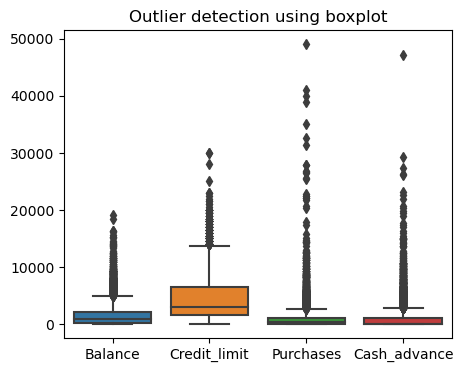

In [7]:
# Identifying the outlier using Boxplot

plt.figure(figsize=(5,4))
sns.boxplot(df[['Balance','Credit_limit','Purchases','Cash_advance']])
plt.title('Outlier detection using boxplot')
plt.show()

### Observation -- Outliers are present in the dataset.

In [8]:
# Treating the outliers using the Capping method.

for i in df.columns:
    if df[i].dtype!='object':
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        IQR=q3-q1
    
        lower = q1-1.5*IQR
        upper = q3+1.5*IQR
        df[i]=np.where(df[i]>upper,upper,np.where(df[i]<lower,lower,df[i]))

### Here, capping method is used instead of trimming the outliers so that the data is not lost. In Capping Method, the outlier values are replaced either with the Upper limit or with the Lower limit of the Interquartile range (IQR).

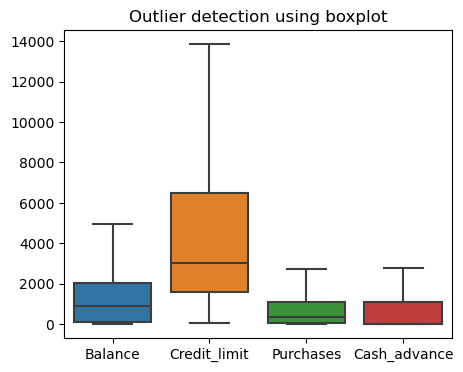

In [9]:
# Re-checking the outliers

plt.figure(figsize=(5,4))
sns.boxplot(df[['Balance','Credit_limit','Purchases','Cash_advance']])
plt.title('Outlier detection using boxplot')
plt.show()

In [10]:
# Identiying the null values
df.isnull().sum()

Customer_ID                       0
Card_type                         0
City                              0
Gender                            0
Credit_limit                      0
Balance                           0
Payments                          0
Purchases                         0
Oneoff_purchases                  0
Installment_purchases             0
Cash_advance                      0
Purchase_frequency                0
Oneoff_purchase_frequency         0
Purchase_installment_frequency    0
dtype: int64

# Exploratory Data Analysis (EDA)

Silver      5400
Gold        2709
Platinum     704
Titanium     137
Name: Card_type, dtype: int64


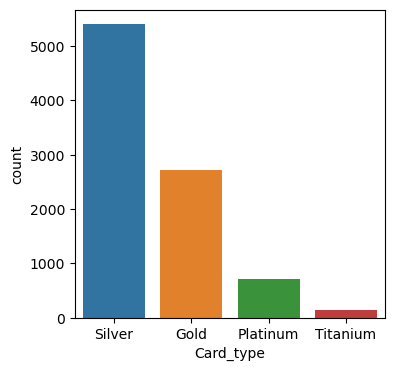

In [11]:
# Countplot of card type

plt.figure(figsize=(4,4))
sns.countplot(x = 'Card_type', data = df)
print(df['Card_type'].value_counts())
plt.show()

### OBSERVATIONS
* Out of total 8950 users, 5400 (60.33 %) users have Silver credit card (Lower middle income group).
* 2709 (30.26 %) users have Gold credit card (Upper middle income group).
* 841 (9.4 %) users Collectively has Platinum and Titanium card (Higher income group)

The average Credit limit is 4419.304198967973
Number of Users having Credit limit higher than the average limit is  3552


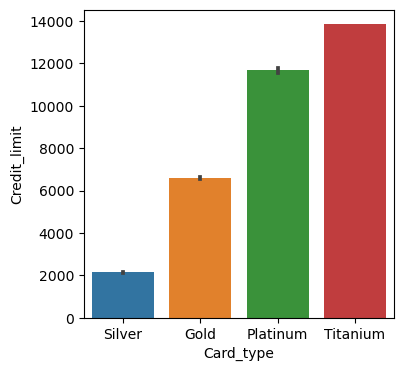

In [12]:
# Relationship between Card_type and Credit_limit

plt.figure(figsize=(4,4))
sns.barplot(x='Card_type', y ='Credit_limit', data = df)
print('The average Credit limit is', df['Credit_limit'].mean())
print('Number of Users having Credit limit higher than the average limit is ',
      df[df['Credit_limit'] > 4419.30].value_counts().sum())
plt.show()

### OBSERVATIONS
* Users having Titanium card have the highest Credit Limit, followed by the users having Platinum Card.
* Users having Silver card have the lowest Credit limit
* Out of total 8950 users, 3552 (39.68 %) users enjoy the credit limit higher than the average credit limit.
* There is an inverse relation between value count of cards and the credit limit, that is, higher the count of a specific card, lower will be its credit limit. Example -- Silver card has the highest value count but the lowest credit limit.

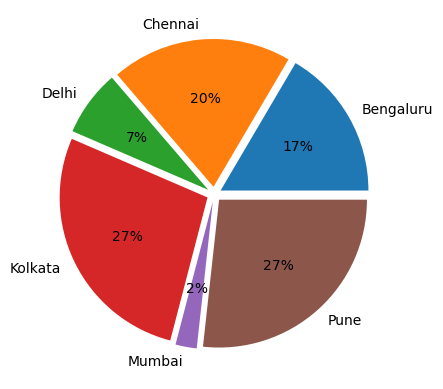

In [13]:
# Relationship between total Purchase amount based on each city using pie chart

explode = (0.05,0.05,0.05,0.05,0.05,0.05)
df.groupby('City').sum().plot(kind='pie',y='Purchases',autopct='%1.0f%%',explode=explode,legend=False)
plt.axis('off')
plt.show()

### OBSERVATION
* Out of the total purchases, 54% purchase amount is contributed by the users from Kolkata and Pune together. 
* Users from New Delhi and Mumbai (the two most expensive cities of India) contributes less than 10% of the total purchase amount.

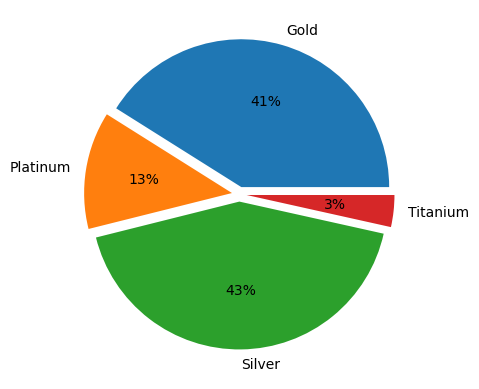

In [14]:
# Relationship between total Purchase amount based on card type using pie chart

explode = (0.05,0.05,0.05,0.05)
df.groupby('Card_type').sum().plot(kind='pie',y='Purchases',autopct='%1.0f%%',explode=explode,legend=False)
plt.axis('off')
plt.show()

## Observation 
* Majority of the purchases are made by users from lower middle (Silver card holders) and upper middle (Gold card holders).
* Silver card holders made the highest purchases (43 %), followed by Gold card holders (41 %) and together they contribute 84% of total purchase amount.
* Higher income group (Platinum and Titanium card holders) contribute only 16% to the purchases.

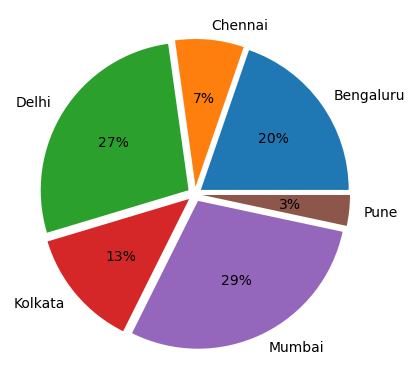

In [16]:
# Relationship between City and average Credit limit using pie chart

explode = (0.05,0.05,0.05,0.05,0.05,0.05)
df.groupby('City').mean().plot(kind='pie',y='Credit_limit',autopct='%1.0f%%',explode=explode,legend=False)
plt.axis('off')
plt.show()

## Observation
* Users from Mumbai have the highest average credit limit (29 %), followed by Delhi (27 %). (Note -- Delhi and Mumbai are the top expensive cities of India)
* Users from Pune have the lowest average credit limit among other cities (3%).

<Axes: xlabel='City'>

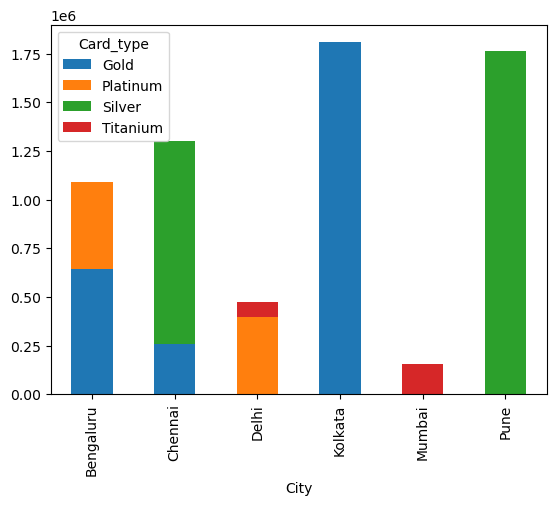

In [17]:
# Relationship between City, card type and purchases made using stacked bar chart

df.groupby(by=['City','Card_type'])['Purchases'].sum().unstack().plot(kind='bar',stacked=True)

## Observation
* All the users from Pune holds Silver credit card. (Lower middle income city).
* All the users from Kolkata holds Gold credit card (Upper middle income city).
* All the users from Mumbai holds Titanium credit card (Higher income group).
* Majority of users in Delhi hold Platinum card, followed by Titanium card type.
* Majority of users from Bengaluru holds Gold credit card, followed by Platinum credit card.

<Axes: xlabel='Card_type'>

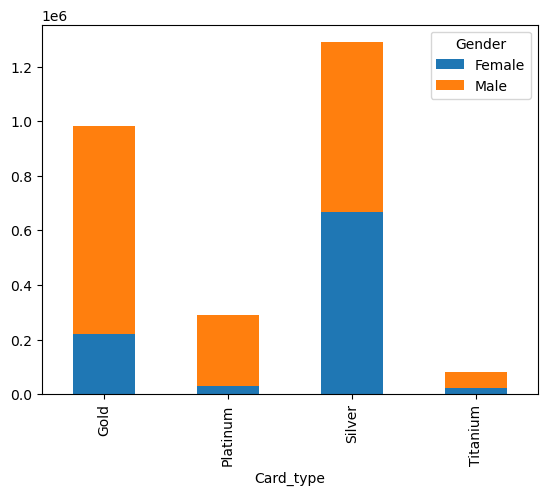

In [18]:
# Relationship between Card type, Gender and Installment purchases made using stacked bar chart

df.groupby(by=['Card_type','Gender'])['Installment_purchases'].sum().unstack().plot(kind='bar',stacked=True)

## Observation
* Majority of males users make purchases in installments. (Lower income group).
* Silver card holders make highest purchases in installments, followed by Gold card holders.
* Female users holding Silver card make more purchases in installments as compared to female users who hold other type of cards.
* Titanium card holders make lowest purchases in installments, followed by Platinum card holders (Higher income group).

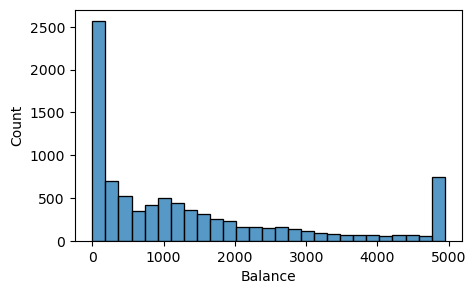

In [19]:
# Distribution of Balance amount using Histogram

plt.figure(figsize=(5,3))
sns.histplot(df['Balance'])
plt.show()

## Observation
* The Balance amount is skewed towards right.
* Majority of the Balance values lie below 2000.

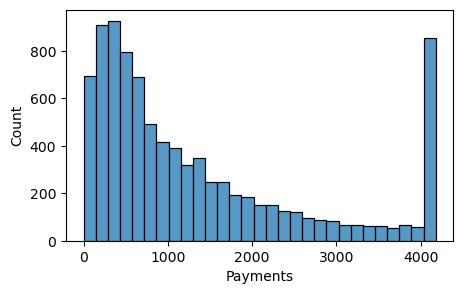

In [20]:
# Distribution of Payment amount using Histogram

plt.figure(figsize=(5,3))
sns.histplot(df['Payments'])
plt.show()

## Observation
* The Payment amount is highly skewed towards right.
* Majority of Payment amount lie between the range of 0 to 2000.

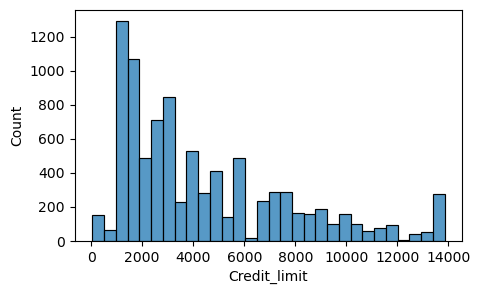

In [21]:
# Distribution of Credit limit using Histogram

plt.figure(figsize=(5,3))
sns.histplot(df['Credit_limit'])
plt.show()

## Observation
* The credit limit is also skewed towards right.
* Majority of Credit limit is in the range of 1000 to 6000.

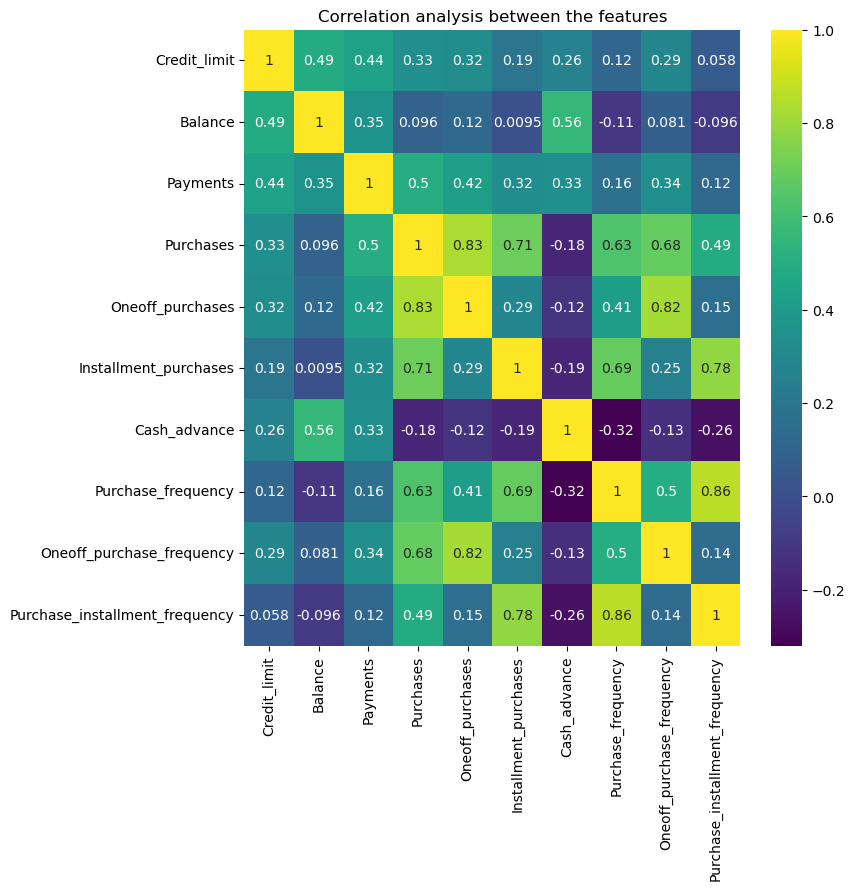

In [23]:
# correlation between numeric features using heatmap

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')
plt.title('Correlation analysis between the features')
plt.yticks(rotation=0)
plt.show()

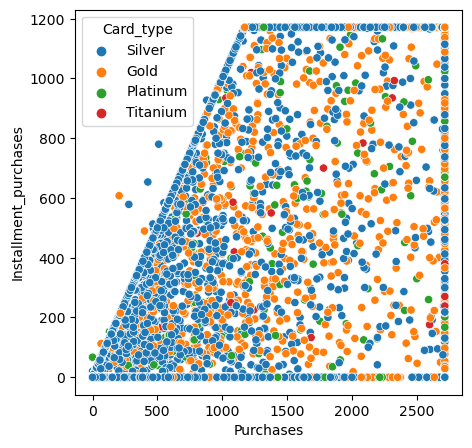

In [24]:
# Scatterplot of Item MRP and Outlet sales

plt.figure(figsize=(5,5))
sns.scatterplot(x = 'Purchases', y = 'Installment_purchases', hue = 'Card_type', data = df)
plt.show()

## Observation
* Majority of lower value purchases (below 1000) are made by Silver card holders, whereas higher value purchases (above 1000) are made by Gold card holders.
* There is a high positive correlation between purchase amount and installment purchase amount.

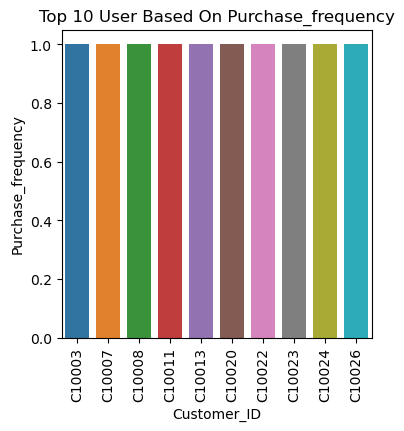

In [25]:
# Top 10 users based on Purchase frequency

plt.figure(figsize=(4,4))
top_purchase = df.nlargest(10,['Purchase_frequency'])
sns.barplot(x = 'Customer_ID',y = 'Purchase_frequency', data = top_purchase)
plt.title('Top 10 User Based On Purchase_frequency')
plt.ylabel('Purchase_frequency')
plt.xticks(rotation = 90)
plt.show()

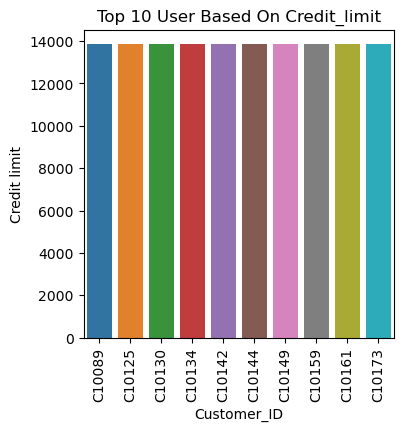

In [26]:
# Top 10 users based on Credit limit

plt.figure(figsize=(4,4))
top_cr = df.nlargest(10,['Credit_limit'])
sns.barplot(x = 'Customer_ID',y = 'Credit_limit', data = top_cr)
plt.title('Top 10 User Based On Credit_limit')
plt.ylabel('Credit limit')
plt.xticks(rotation = 90)
plt.show()

# Saving the cleaned dataset for model building.

In [27]:
df.to_csv('After_EDA.csv')

# NOTE : The Clustering model building part of the project is performed in 'User Segmentation (Model Building).ipynb' file.